### Imports

In [1]:
import torch
import json
import h5py
import random
import numpy as np
from glob import glob
import re
from matplotlib.pyplot import imshow
from PIL import Image, ImageDraw

### Output Cleanup
(Generally not needed). This code edits the path to the images in the `.json` files. 

In [2]:
# pathsplitter = re.compile("/")
# correct_paths = list()

# for puzzle in puzzles:
#     correct_paths = list()
#     custom_data_info = json.load(open(f'./../datasets/vdp/outputs/{puzzle}/custom_data_info.json'))
#     for file_path in custom_data_info['idx_to_files']:
#         correct_paths.append("./../datasets/vdp/images/" + "/".join(pathsplitter.split(file_path)[-2:]))
#     custom_data_info['idx_to_files'] = correct_paths
#     with open(f'./../datasets/vdp/outputs/{puzzle}/custom_data_info.json', 'w') as json_file:
#         json.dump(custom_data_info, json_file)

### Parameters

In [3]:
# params
puzzle_idx = 0
image_idx = 0
box_topk = 30 # select top k bounding boxes
rel_topk = 20 # select top k relationships

### Viz code

In [4]:
# load the following to files from DETECTED_SGG_DIR
puzzles = [re.split("/", path)[-1] for path in glob("./../datasets/vdp/images/*")]

In [5]:
def draw_single_box(pic, box, color='red', draw_info=None):
    draw = ImageDraw.Draw(pic)
    x1,y1,x2,y2 = int(box[0]), int(box[1]), int(box[2]), int(box[3])
    draw.rectangle(((x1, y1), (x2, y2)), outline=color)
    if draw_info:
        draw.rectangle(((x1, y1), (x1+50, y1+10)), fill=color)
        info = draw_info
        draw.text((x1, y1), info)
        
def print_list(name, input_list, scores=None):
    for i, item in enumerate(input_list):
        if scores == None:
            print(name + ' ' + str(i) + ': ' + str(item))
        else:
            print(name + ' ' + str(i) + ': ' + str(item) + '; score: ' + str(scores[i]))
    
def draw_image(img_path, boxes, box_labels, rel_labels, box_scores=None, rel_scores=None):
    size = get_size(Image.open(img_path).size)
    pic = Image.open(img_path).resize(size)
    num_obj = len(boxes)
    for i in range(num_obj):
        info = str(i) + '_' + box_labels[i]
        draw_single_box(pic, boxes[i], draw_info=info)
    
    display(pic)
    print('*' * 50)
    print_list('box_labels', box_labels, box_scores)
    print('*' * 50)
    print_list('rel_labels', rel_labels, rel_scores)
    
    return None

def get_size(image_size):
    min_size = 600
    max_size = 1000
    w, h = image_size
    size = min_size
    if max_size is not None:
        min_original_size = float(min((w, h)))
        max_original_size = float(max((w, h)))
        if max_original_size / min_original_size * size > max_size:
            size = int(round(max_size * min_original_size / max_original_size))
    if (w <= h and w == size) or (h <= w and h == size):
        return (w, h)
    if w < h:
        ow = size
        oh = int(size * h / w)
    else:
        oh = size
        ow = int(size * w / h)
    return (ow, oh)

In [6]:
# data parameters


In [7]:
def viz(puzzle_idx, image_idx, box_topk=30, rel_topk=20):
    custom_prediction = json.load(open(f'./../datasets/vdp/outputs/{puzzles[puzzle_idx]}/custom_prediction.json'))
    custom_data_info = json.load(open(f'./../datasets/vdp/outputs/{puzzles[puzzle_idx]}/custom_data_info.json'))
    ind_to_classes = custom_data_info['ind_to_classes']
    ind_to_predicates = custom_data_info['ind_to_predicates']
    image_path = custom_data_info['idx_to_files'][image_idx]
    boxes = custom_prediction[str(image_idx)]['bbox'][:box_topk]
    box_labels = custom_prediction[str(image_idx)]['bbox_labels'][:box_topk]
    box_scores = custom_prediction[str(image_idx)]['bbox_scores'][:box_topk]
    all_rel_labels = custom_prediction[str(image_idx)]['rel_labels']
    all_rel_scores = custom_prediction[str(image_idx)]['rel_scores']
    all_rel_pairs = custom_prediction[str(image_idx)]['rel_pairs']

    for i in range(len(box_labels)):
        box_labels[i] = ind_to_classes[box_labels[i]]

    rel_labels = []
    rel_scores = []
    for i in range(len(all_rel_pairs)):
        if all_rel_pairs[i][0] < box_topk and all_rel_pairs[i][1] < box_topk:
            rel_scores.append(all_rel_scores[i])
            label = str(all_rel_pairs[i][0]) + '_' + box_labels[all_rel_pairs[i][0]] + ' => ' + ind_to_predicates[all_rel_labels[i]] + ' => ' + str(all_rel_pairs[i][1]) + '_' + box_labels[all_rel_pairs[i][1]]
            rel_labels.append(label)

    rel_labels = rel_labels[:rel_topk]
    rel_scores = rel_scores[:rel_topk]

    draw_image(image_path, boxes, box_labels, rel_labels, box_scores=box_scores, rel_scores=rel_scores)
    
    

### Visualizaiton
Run `viz(puzzle_idx, image_idx, box_topk, rel_topk)` to view an image and the associated labels / predictions

In [8]:
print("puzzle index mapping")
{print("\t{v:10.10s}... @ idx {k:2d}".format(v=v, k=k)) for k, v in (enumerate(puzzles))}

puzzle index mapping
	alldogsons... @ idx  0
	kitchen_ab... @ idx  1
	catontv_ab... @ idx  2
	topmost_ab... @ idx  3
	2on1_abe-c... @ idx  4
	sleeping_a... @ idx  5
	desktop_ab... @ idx  6
	populatedb... @ idx  7
	dogherded_... @ idx  8
	umbrella_a... @ idx  9
	pplandties... @ idx 10
	parkmeter_... @ idx 11
	tvon_abc-1... @ idx 12
	diagonal_a... @ idx 13
	pplwearing... @ idx 14
	samelevel_... @ idx 15
	allcatsons... @ idx 16
	personball... @ idx 17


{None}

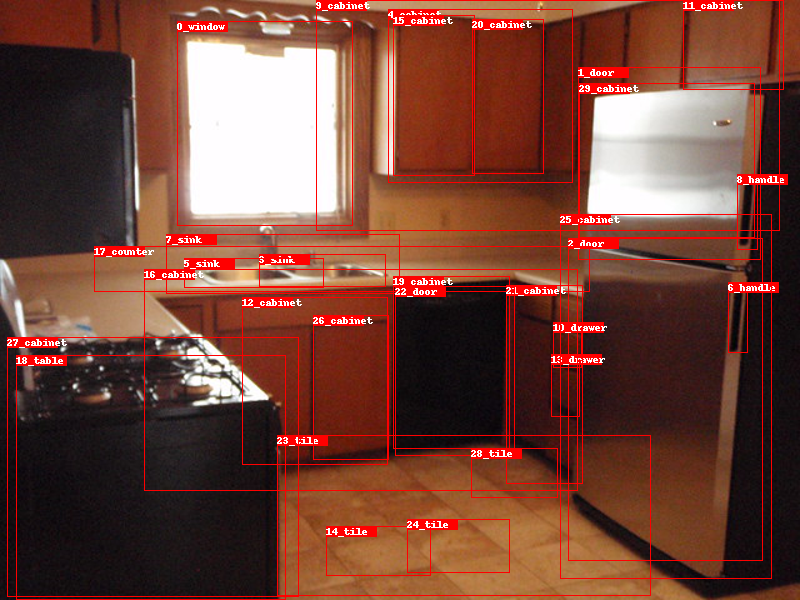

**************************************************
box_labels 0: window; score: 0.718130350112915
box_labels 1: door; score: 0.5644476413726807
box_labels 2: door; score: 0.5472050309181213
box_labels 3: sink; score: 0.45410871505737305
box_labels 4: cabinet; score: 0.40461522340774536
box_labels 5: sink; score: 0.3855801522731781
box_labels 6: handle; score: 0.3413845896720886
box_labels 7: sink; score: 0.29966309666633606
box_labels 8: handle; score: 0.22518987953662872
box_labels 9: cabinet; score: 0.22436003386974335
box_labels 10: drawer; score: 0.1911451369524002
box_labels 11: cabinet; score: 0.181160107254982
box_labels 12: cabinet; score: 0.17282073199748993
box_labels 13: drawer; score: 0.15706433355808258
box_labels 14: tile; score: 0.11427859216928482
box_labels 15: cabinet; score: 0.11358267813920975
box_labels 16: cabinet; score: 0.10693343728780746
box_labels 17: counter; score: 0.09703055769205093
box_labels 18: table; score: 0.09273968636989594
box_labels 19: cabinet; 

In [9]:
viz(1, 1)